In [1]:
import numpy as np

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [4]:
pip install matplotlib

## Original shapes

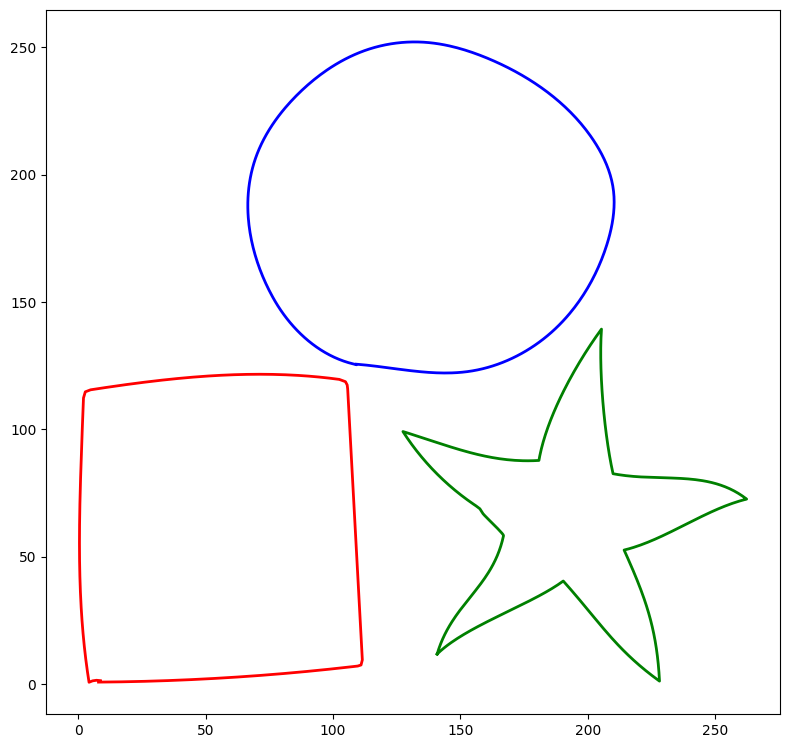

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV file and parse polyline data
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot original shapes
def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Main function to execute the algorithm
def main():
    csv_path = '../Adobe GenSolve/problems/problems/isolated.csv'  # Update with actual CSV file path
    path_XYs = read_csv(csv_path)
    plot(path_XYs)

if __name__ == "__main__":
    main()


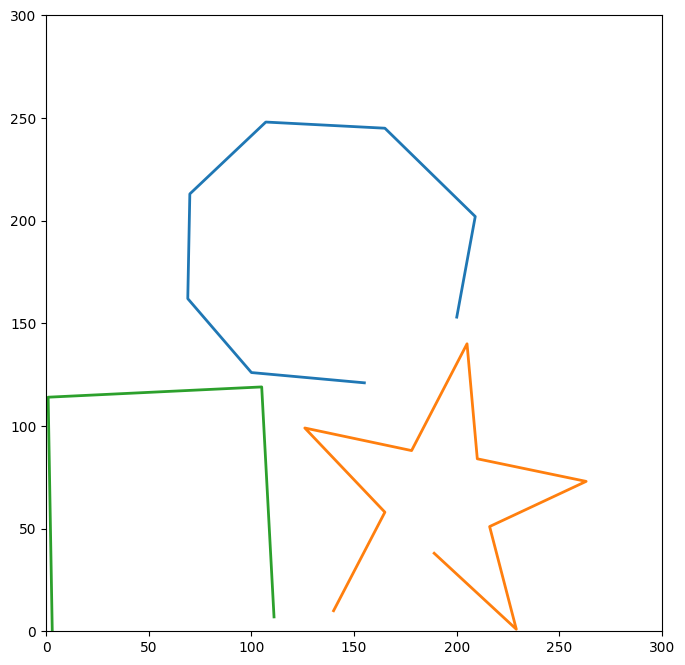

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to read CSV file and parse polyline data
def read_csv(csv_path):
    data = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    
    # Get unique shape identifiers (first column)
    shape_ids = np.unique(data[:, 0])
    
    for shape_id in shape_ids:
        # Filter data for the current shape_id
        shape_data = data[data[:, 0] == shape_id]
        
        # Get unique part identifiers (second column)
        part_ids = np.unique(shape_data[:, 1])
        
        shape_parts = []
        for part_id in part_ids:
            # Extract the points for this part
            part_data = shape_data[shape_data[:, 1] == part_id, 2:]
            shape_parts.append(part_data)
        
        path_XYs.append(shape_parts)
    
    return path_XYs

# Function to detect and regularize shapes
def detect_and_regularize_shapes(XYs):
    img = np.zeros((512, 512), dtype=np.uint8)
    
    for XY in XYs:
        for points in XY:
            pts = points.reshape((-1, 1, 2)).astype(np.int32)
            cv2.polylines(img, [pts], isClosed=True, color=255, thickness=2)
    
    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    regularized_shapes = []
    
    for contour in contours:
        # Approximate contour to remove noise
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        # Regularize and store the shape
        regularized_shapes.append(approx)
    
    return regularized_shapes

# Function to plot regularized shapes
def plot_regularized_shapes(shapes):
    plt.figure(figsize=(8, 8))
    
    for shape in shapes:
        shape = shape.reshape(-1, 2)  # Reshape to (n, 2)
        plt.plot(shape[:, 0], shape[:, 1], linewidth=2)
    
    plt.gca().set_aspect('equal')
    plt.xlim([0, 300])
    plt.ylim([0, 300])
    plt.show()

def main():
    csv_path = '../Adobe GenSolve/problems/problems/isolated.csv'  # Update with the correct path
    path_XYs = read_csv(csv_path)
    
    # Detect and regularize shapes
    regularized_shapes = detect_and_regularize_shapes(path_XYs)
    
    # Plot regularized shapes
    plot_regularized_shapes(regularized_shapes)

if __name__ == "__main__":
    main()


C:\Users\gaura\AppData\Local\Temp\ipykernel_53680\1166320148.py:53: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


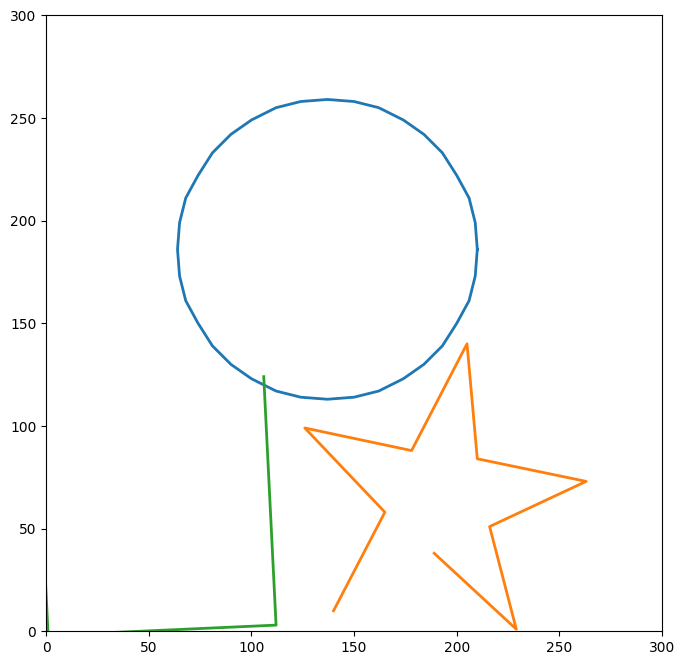

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to read CSV file and parse polyline data
def read_csv(csv_path):
    data = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    
    # Get unique shape identifiers (first column)
    shape_ids = np.unique(data[:, 0])
    
    for shape_id in shape_ids:
        # Filter data for the current shape_id
        shape_data = data[data[:, 0] == shape_id]
        
        # Get unique part identifiers (second column)
        part_ids = np.unique(shape_data[:, 1])
        
        shape_parts = []
        for part_id in part_ids:
            # Extract the points for this part
            part_data = shape_data[shape_data[:, 1] == part_id, 2:]
            shape_parts.append(part_data)
        
        path_XYs.append(shape_parts)
    
    return path_XYs

# Function to detect and regularize shapes
def detect_and_regularize_shapes(XYs):
    img = np.zeros((512, 512), dtype=np.uint8)
    
    for XY in XYs:
        for points in XY:
            pts = points.reshape((-1, 1, 2)).astype(np.int32)
            cv2.polylines(img, [pts], isClosed=True, color=255, thickness=2)
    
    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    regularized_shapes = []
    
    for contour in contours:
        # Calculate epsilon based on the perimeter
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 4:
            # Regularize as a rectangle or square
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            regularized_shapes.append(box)
        elif len(approx) == 10:
            # Assuming this is a star
            regularized_shapes.append(approx)
        else:
            # Assuming this is a circle
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            # Create a circle
            circle_pts = cv2.ellipse2Poly(center, (radius, radius), 0, 0, 360, 10)
            regularized_shapes.append(circle_pts)
    
    return regularized_shapes

# Function to plot regularized shapes
def plot_regularized_shapes(shapes):
    plt.figure(figsize=(8, 8))
    
    for shape in shapes:
        shape = shape.reshape(-1, 2)  # Reshape to (n, 2)
        plt.plot(shape[:, 0], shape[:, 1], linewidth=2)
    
    plt.gca().set_aspect('equal')
    plt.xlim([0, 300])
    plt.ylim([0, 300])
    plt.show()

def main():
    csv_path = '../Adobe GenSolve/problems/problems/isolated.csv'  # Update with the correct path
    path_XYs = read_csv(csv_path)
    
    # Detect and regularize shapes
    regularized_shapes = detect_and_regularize_shapes(path_XYs)
    
    # Plot regularized shapes
    plot_regularized_shapes(regularized_shapes)

if __name__ == "__main__":
    main()

## Expected result

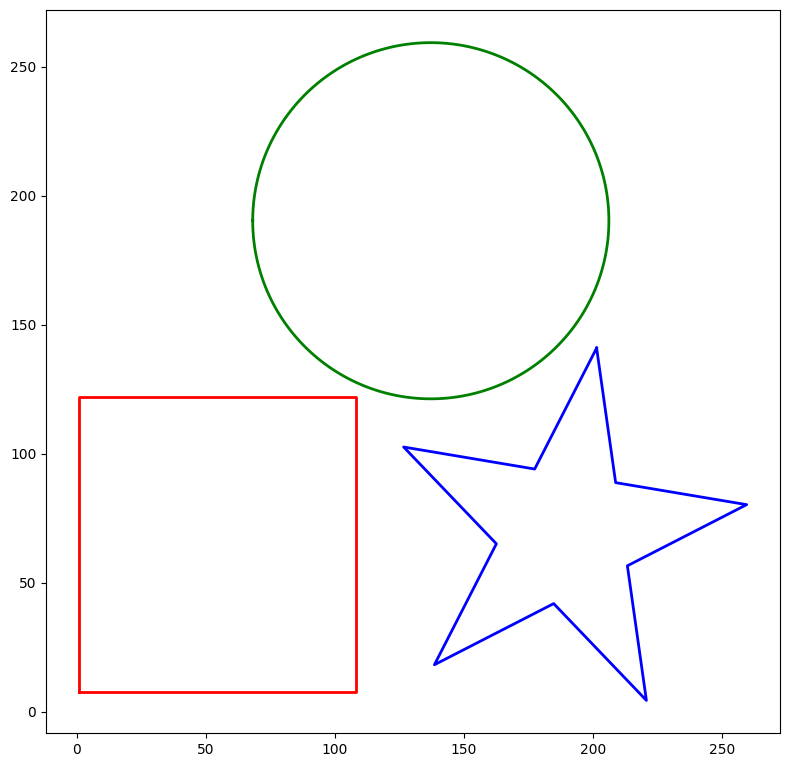

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV file and parse polyline data
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Function to plot original shapes
def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Main function to execute the algorithm
def main():
    csv_path = '../Adobe GenSolve/problems/problems/isolated_sol.csv'  # Update with actual CSV file path
    path_XYs = read_csv(csv_path)
    plot(path_XYs)

if __name__ == "__main__":
    main()
